In [1]:
## Import statements:
import pandas as pd
import matplotlib.pyplot as plt

## Plot style:
plt.style.use('seaborn')

In [27]:
## Change the way big numbers are presented:
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = pd.read_excel('../datasets/AdventureWorks.xlsx')

In [3]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
df.shape

(904, 16)

In [5]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
df['Valor Venda'].sum()

5984606.1426

In [7]:
df['Custo'] = df['Custo Unitário'] * df['Quantidade']

In [8]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
df.Custo.sum().round(2)

2486783.05

In [11]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
df.Lucro.sum().round(2)

3497823.09

In [14]:
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [19]:
df['Tempo Envio'] = df['Tempo Envio'].dt.days

In [23]:
df['Tempo Envio'].dtype

dtype('int64')

In [22]:
df.groupby("Marca")['Tempo Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [25]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [28]:
df.groupby([df['Data Venda'].dt.year, "Marca"]).Lucro.sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [30]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"]).Lucro.sum().reset_index()

lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [31]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

<AxesSubplot:ylabel='Produto'>

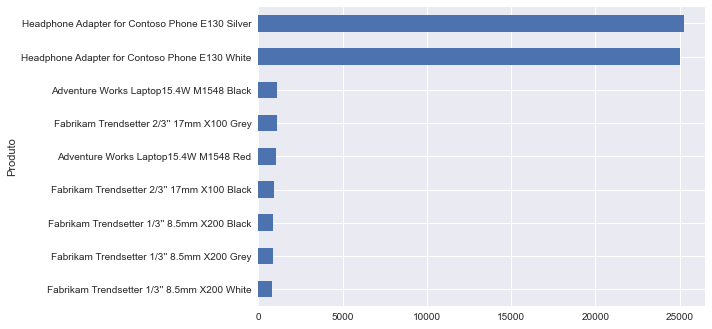

In [34]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh()

<AxesSubplot:xlabel='Data Venda'>

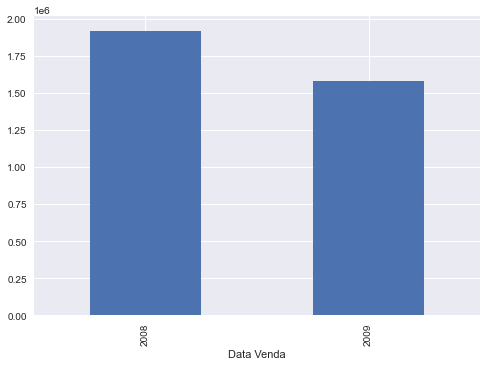

In [35]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar()

In [36]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [39]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
606,2009-12-10,2009-12-22,306,1155,19078,200912104CS780,324.69,980.00,8,"1,568.00","6,272.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"2,597.52","3,674.48",12
148,2009-07-06,2009-07-10,306,366,19070,200907063CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"2,091.48","2,456.52",4
296,2009-09-16,2009-09-25,307,2497,19135,200909165CS725,5.09,9.99,240,0.00,"2,397.60",Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,"1,221.60","1,176.00",9
321,2009-02-18,2009-02-24,306,384,19062,200902183CS737,348.58,758.00,16,848.96,"11,279.04",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"5,577.28","5,701.76",6
852,2009-02-08,2009-02-14,306,1202,19062,200902084CS737,330.66,998.00,6,419.16,"5,568.84",Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"1,983.96","3,584.88",6


<AxesSubplot:xlabel='Data Venda'>

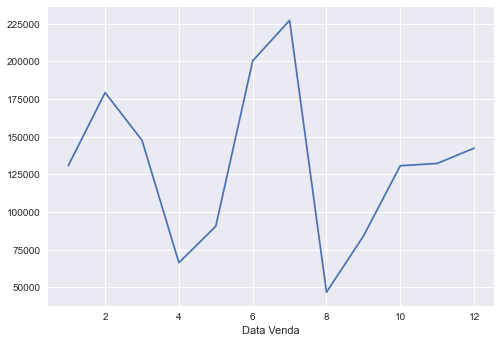

In [41]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot();

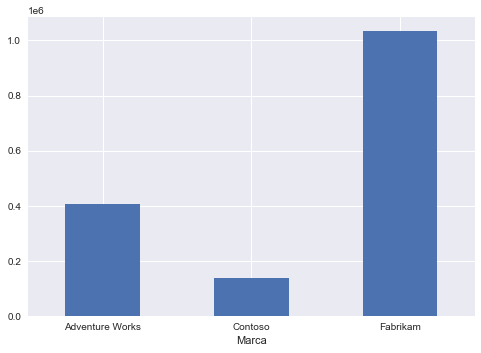

In [44]:
df_2009.groupby(df['Marca'])['Lucro'].sum().plot.bar();
plt.xticks(rotation='horizontal');

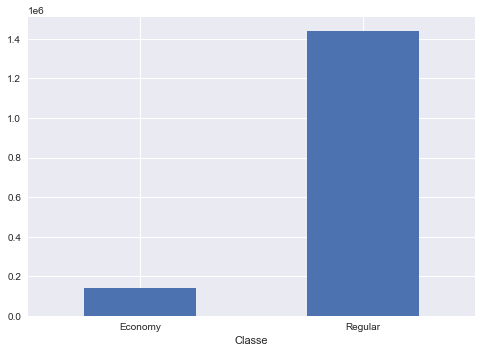

In [45]:
df_2009.groupby(df['Classe'])['Lucro'].sum().plot.bar();
plt.xticks(rotation='horizontal');

In [46]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

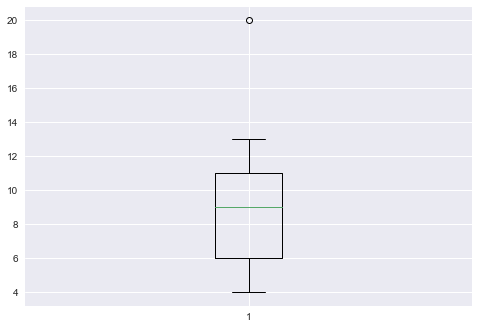

In [49]:
plt.boxplot(df['Tempo Envio']);

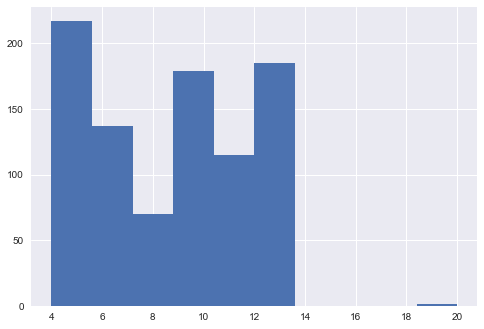

In [52]:
plt.hist(df['Tempo Envio']);

In [54]:
df['Tempo Envio'].min()

4

In [55]:
df['Tempo Envio'].max()

20

In [56]:
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [58]:
# df.to_csv('../datasets/AdventureWorks_new.csv', index=False) # To save the new dataset, uncomment this line 